In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/LAXMI NISHAD/OneDrive/Desktop/Python_lectures/Loan_dataset.csv")
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# 1.What is the average current loan amount for each loan status?
df.groupby('Loan Status')['Current Loan Amount'].mean()

Loan Status
Charged Off    3.249752e+05
Fully Paid     1.510694e+07
Name: Current Loan Amount, dtype: float64

In [4]:
# 2.How does the credit score vary with the annual income?
df1=df.groupby('Annual Income')['Credit Score'].sum().reset_index()
df2=df1.sort_values(by='Credit Score',ascending=False)
df2

,Annual Income,Credit Score
12219,968240.0,31060.0
7270,750196.0,30990.0
15878,1140912.0,29503.0
7527,761824.0,29017.0
7267,750044.0,28640.0
...,...,...
35206,3937465.0,588.0
35705,4975568.0,587.0
19650,1343414.0,586.0
8732,812877.0,586.0


In [6]:
# 3.Is there a correlation between the number of open accounts and the current credit balance?
df[['Number of Open Accounts','Current Credit Balance']].corr()

,Number of Open Accounts,Current Credit Balance
Number of Open Accounts,1.000000,0.228136
Current Credit Balance,0.228136,1.000000


<Axes: xlabel='Credit Score', ylabel='Home Ownership'>

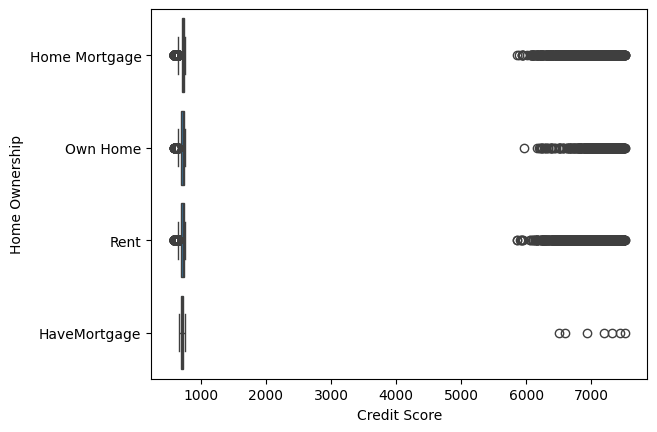

In [38]:
# 4.What is the distribution of credit scores across different home ownership types?
import seaborn as sns
sns.boxplot(data=df,x='Credit Score',y='Home Ownership')

In [23]:
# 5.How does the annual income differ for different purposes of loans?
df1=df.groupby('Purpose')['Annual Income'].sum().reset_index()
df2=df1.sort_values(by='Annual Income',ascending=False)
df2

,Purpose,Annual Income
3,Debt Consolidation,8.626302e+10
5,Home Improvements,7.870304e+09
11,other,6.451905e+09
7,Other,3.562781e+09
0,Business Loan,2.029753e+09
6,Medical Bills,1.297953e+09
2,Buy a Car,1.249641e+09
1,Buy House,8.448171e+08
8,Take a Trip,5.806718e+08
9,major_purchase,4.034725e+08


In [24]:
# 6.What is the average monthly debt for each term (short-term vs. long-term)?
df.groupby('Term')['Monthly Debt'].mean()

Term
Long Term     21585.664968
Short Term    17274.158442
Name: Monthly Debt, dtype: float64

In [25]:
# 7.Is there a correlation between years of credit history and the current credit balance?
df[['Years of Credit History','Current Credit Balance']].corr()

,Years of Credit History,Current Credit Balance
Years of Credit History,1.00000,0.20847
Current Credit Balance,0.20847,1.00000


In [28]:
# 8.How does the credit score vary with the years in the current job?
df1=df.groupby('Years in current job') ['Credit Score'].sum().reset_index()
df2=df1.sort_values(by='Credit Score',ascending=False)
df2

,Years in current job,Credit Score
1,10+ years,26787599.0
2,2 years,7867323.0
3,3 years,7133806.0
10,< 1 year,7055383.0
0,1 year,5811980.0
5,5 years,5777325.0
4,4 years,5102010.0
6,6 years,5044588.0
7,7 years,5044234.0
8,8 years,3956660.0


<Axes: xlabel='Number of Credit Problems', ylabel='Number of Open Accounts'>

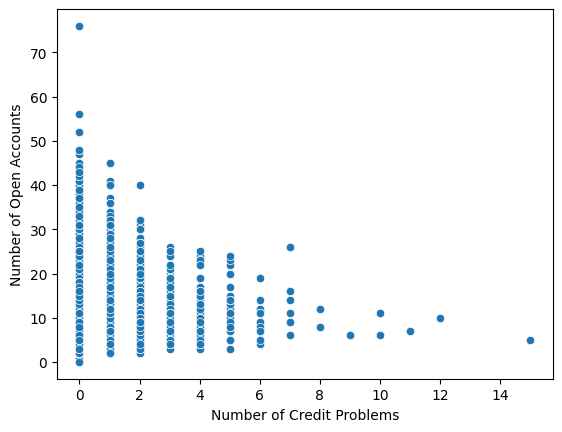

In [31]:
# 9.What is the relationship between the number of credit problems and the number of open accounts?
sns.scatterplot(data=df,x='Number of Credit Problems',y='Number of Open Accounts')

<Axes: xlabel='Loan Status', ylabel='Annual Income'>

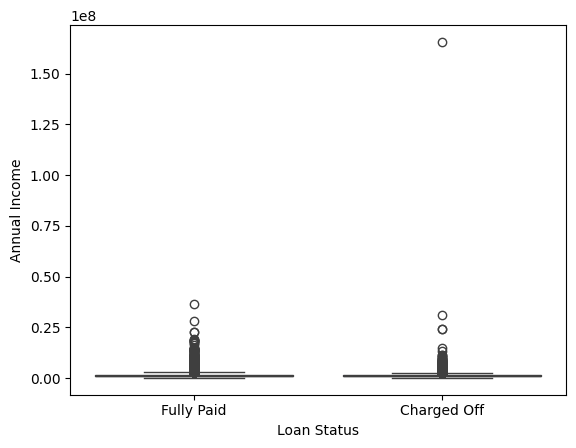

In [37]:
# 10.What is the distribution of annual income across different loan statuses?
sns.boxplot(data=df,x='Loan Status',y='Annual Income')

In [39]:
# 11.Is there a correlation between the current loan amount and the number of open accounts?
df[['Current Loan Amount','Number of Open Accounts']].corr()

,Current Loan Amount,Number of Open Accounts
Current Loan Amount,1.000000,0.001478
Number of Open Accounts,0.001478,1.000000


In [42]:
# 12.How does the monthly debt vary with the years of credit history?
df1=df.groupby('Years of Credit History')['Monthly Debt'].sum().reset_index()
df2=df1.sort_values(by='Monthly Debt',ascending=False)
df2

,Years of Credit History,Monthly Debt
124,16.0,24586013.87
114,15.0,23805986.73
134,17.0,22881515.13
129,16.5,21236080.36
139,17.5,19879837.56
...,...,...
459,49.8,4551.45
496,57.0,4508.70
488,53.8,3323.29
1,3.7,3148.30


In [43]:
# 13.What is the average annual income for each purpose of loan?
df.groupby('Purpose')['Annual Income'].mean()

Purpose
Business Loan           1.591963e+06
Buy House               1.495251e+06
Buy a Car               1.220353e+06
Debt Consolidation      1.362464e+06
Educational Expenses    1.071051e+06
Home Improvements       1.667437e+06
Medical Bills           1.409286e+06
Other                   1.348516e+06
Take a Trip             1.219899e+06
major_purchase          1.430753e+06
moving                  1.591375e+06
other                   1.286008e+06
renewable_energy        1.473740e+06
small_business          1.547456e+06
vacation                1.155290e+06
wedding                 1.464233e+06
Name: Annual Income, dtype: float64

In [45]:
# 14.How does the credit score vary with the number of credit problems?
df1=df.groupby('Number of Credit Problems')['Credit Score'].sum().reset_index()
df2=df1.sort_values(by='Credit Score',ascending=False)
df2

,Number of Credit Problems,Credit Score
0,0.0,74966472.0
1,1.0,10405814.0
2,2.0,1158462.0
3,3.0,288137.0
4,4.0,116036.0
5,5.0,55208.0
6,6.0,17696.0
12,12.0,7200.0
7,7.0,5002.0
8,8.0,2858.0


In [46]:
# 15.Is there a correlation between the number of credit problems and the current credit balance?
df[['Number of Credit Problems','Current Credit Balance']].corr()

,Number of Credit Problems,Current Credit Balance
Number of Credit Problems,1.000000,-0.112516
Current Credit Balance,-0.112516,1.000000


<Axes: xlabel='Home Ownership', ylabel='Current Loan Amount'>

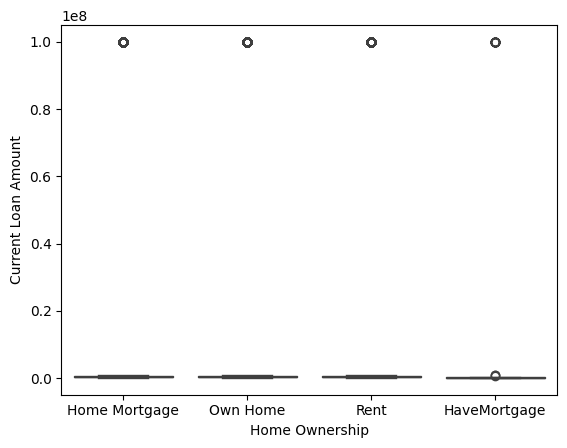

In [51]:
# 16.What is the distribution of current loan amounts across different home ownership types?
sns.boxplot(data=df,x='Home Ownership',y='Current Loan Amount')

In [53]:
# 17.How does the annual income vary with the years in the current job?
df1=df.groupby('Years in current job')['Annual Income'].sum().reset_index()
df2=df1.sort_values(by='Annual Income',ascending=False)
df2

,Years in current job,Annual Income
1,10+ years,3.844998e+10
2,2 years,9.863079e+09
3,3 years,8.860041e+09
10,< 1 year,8.347987e+09
5,5 years,7.377869e+09
0,1 year,6.713135e+09
4,4 years,6.510239e+09
7,7 years,6.287609e+09
6,6 years,6.161153e+09
8,8 years,5.235659e+09


In [54]:
# 18.Is there a correlation between the current loan amount and the monthly debt?
df[['Current Loan Amount','Monthly Debt']].corr()

,Current Loan Amount,Monthly Debt
Current Loan Amount,1.000000,-0.006643
Monthly Debt,-0.006643,1.000000


In [55]:
# 19.What is the average monthly debt for each home ownership type?
df.groupby('Home Ownership')['Monthly Debt'].mean()

Home Ownership
HaveMortgage     18541.776822
Home Mortgage    21072.059467
Own Home         17060.082101
Rent             15796.777284
Name: Monthly Debt, dtype: float64

In [59]:
# 20.How does the credit score vary with the number of open accounts?
df1=df.groupby('Number of Open Accounts')['Credit Score'].sum().reset_index()
df2=df1.sort_values(by='Credit Score',ascending=False)
df2

,Number of Open Accounts,Credit Score
9,9.0,8061922.0
10,10.0,7822070.0
11,11.0,7726628.0
8,8.0,7574712.0
7,7.0,6920616.0
12,12.0,6528665.0
6,6.0,5864478.0
13,13.0,5340277.0
14,14.0,4474586.0
5,5.0,4002617.0


<Axes: xlabel='Loan Status', ylabel='Credit Score'>

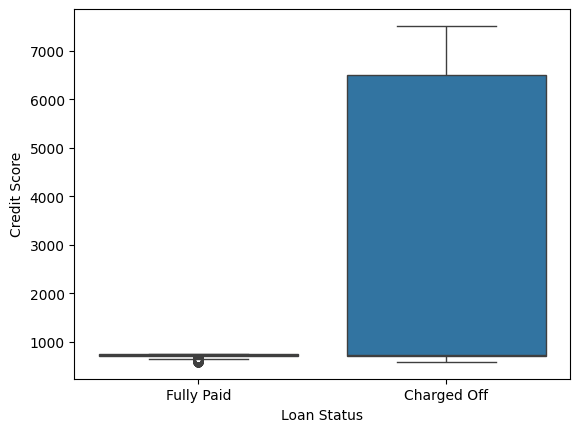

In [61]:
# 21.What is the distribution of credit scores across different loan statuses?
sns.boxplot(data=df,x='Loan Status',y='Credit Score')

In [62]:
# 22.Is there a correlation between the current loan amount and the years of credit history?
df[['Current Loan Amount','Years of Credit History']].corr()

,Current Loan Amount,Years of Credit History
Current Loan Amount,1.000000,0.019282
Years of Credit History,0.019282,1.000000


In [64]:
# 23.How does the monthly debt vary with the number of credit problems?
df1=df.groupby('Number of Credit Problems')['Monthly Debt'].sum().reset_index()
df2=df1.sort_values(by='Monthly Debt',ascending=False)
df2

,Number of Credit Problems,Monthly Debt
0,0.0,1.619387e+09
1,1.0,1.951776e+08
2,2.0,2.209683e+07
3,3.0,6.686827e+06
4,4.0,2.208436e+06
5,5.0,9.635580e+05
6,6.0,3.092047e+05
7,7.0,1.893491e+05
8,8.0,1.217585e+05
9,9.0,2.848936e+04


In [66]:
# 24.What is the average current loan amount for each purpose of loan?
df.groupby('Purpose')['Current Loan Amount'].mean()

Purpose
Business Loan           7.837789e+06
Buy House               1.106036e+07
Buy a Car               1.414682e+07
Debt Consolidation      1.180683e+07
Educational Expenses    1.428536e+07
Home Improvements       1.252117e+07
Medical Bills           1.179902e+07
Other                   1.253627e+07
Take a Trip             1.111667e+07
major_purchase          1.298956e+07
moving                  1.350072e+07
other                   1.059243e+07
renewable_energy        1.975534e+05
small_business          9.484232e+06
vacation                7.058680e+06
wedding                 1.760299e+07
Name: Current Loan Amount, dtype: float64

In [67]:
# 25.How does the credit score vary with the current credit balance?
df1=df.groupby('Current Credit Balance')['Credit Score'].sum().reset_index()
df2=df1.sort_values(by='Credit Score',ascending=False)
df2

,Current Credit Balance,Credit Score
0,0.0,458478.0
5919,118009.0,30550.0
8786,173261.0,28178.0
8516,167998.0,25459.0
12995,256006.0,24250.0
...,...,...
9895,194712.0,0.0
17784,358150.0,0.0
8414,166041.0,0.0
30867,1031111.0,0.0


In [68]:
# 26.Is there a correlation between the annual income and the current credit balance?
df[['Annual Income','Current Credit Balance']].corr()

,Annual Income,Current Credit Balance
Annual Income,1.00000,0.31234
Current Credit Balance,0.31234,1.00000


<Axes: xlabel='Term', ylabel='Annual Income'>

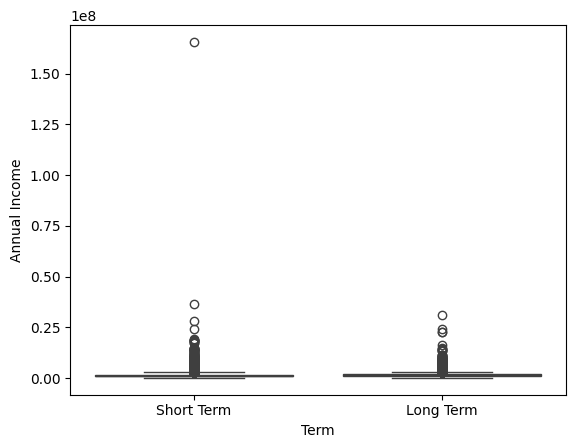

In [69]:
# 27.What is the distribution of annual income across different terms (short-term vs. long-term)?
sns.boxplot(data=df,x='Term',y='Annual Income') 

In [70]:
# 28.How does the credit score vary with the number of credit problems?
df1=df.groupby('Number of Credit Problems')['Credit Score'].sum().reset_index()
df2=df1.sort_values(by='Credit Score',ascending=False)
df2

,Number of Credit Problems,Credit Score
0,0.0,74966472.0
1,1.0,10405814.0
2,2.0,1158462.0
3,3.0,288137.0
4,4.0,116036.0
5,5.0,55208.0
6,6.0,17696.0
12,12.0,7200.0
7,7.0,5002.0
8,8.0,2858.0


In [71]:
# 29.Is there a correlation between the current loan amount and the number of credit problems?
df[['Current Loan Amount','Number of Credit Problems']].corr()

,Current Loan Amount,Number of Credit Problems
Current Loan Amount,1.000000,-0.002795
Number of Credit Problems,-0.002795,1.000000


<Axes: xlabel='Number of Open Accounts', ylabel='Years of Credit History'>

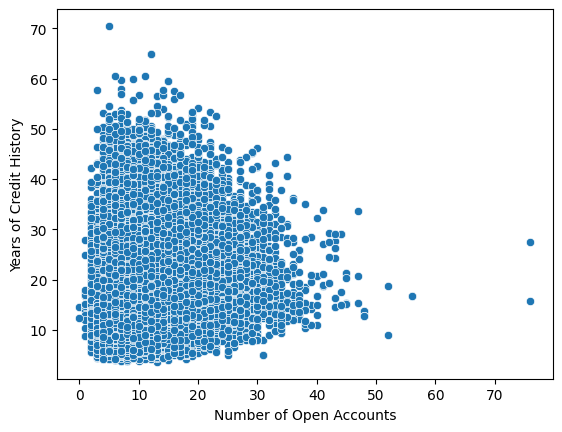

In [73]:
# 30.What is the relationship between the number of open accounts and the years of credit history?
sns.scatterplot(data=df,x='Number of Open Accounts',y='Years of Credit History')